In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from ridge import Ridge_
from sklearn.metrics import mean_absolute_error
from math import inf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
predictor = 'Year'
target = 'Time'

In [3]:
df = pd.read_csv('olympics_100m.csv', sep=',')
X = df[predictor].values
y = df[target].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True, random_state=42)

In [5]:
# don't know if required ??
# Centering and normalizing the data so that the effect of the intercept
# (bias) is not so relevant
x_mean = X_train.mean()
x_std = X_train.std()

# scale the data
X_train = (X_train - x_mean) / x_std
X_train = X_train.reshape(len(X_train), 1)

In [6]:
X_test = (X_test - x_mean) / x_std
X_test = X_test.reshape(len(X_test), 1)

X_val = (X_val - x_mean) / x_std
X_val = X_val.reshape(len(X_val), 1)

In [7]:
poly = PolynomialFeatures(1)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
X_val = poly.fit_transform(X_val)

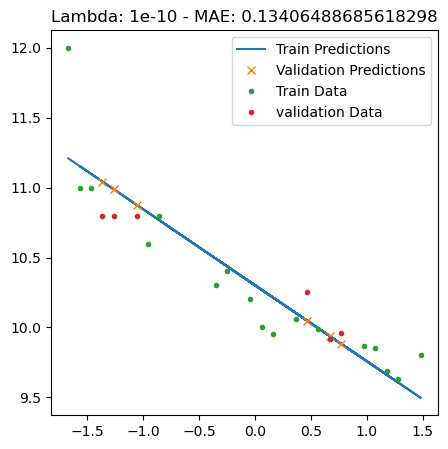

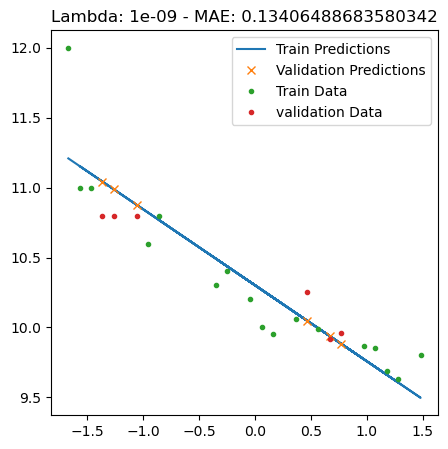

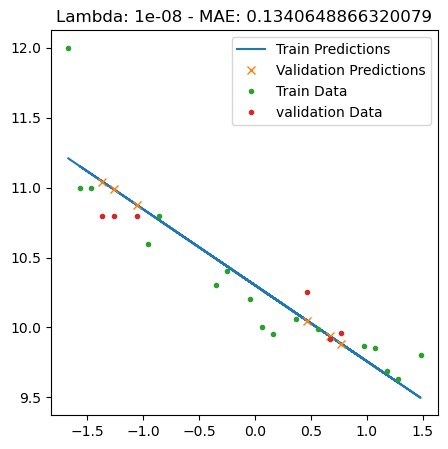

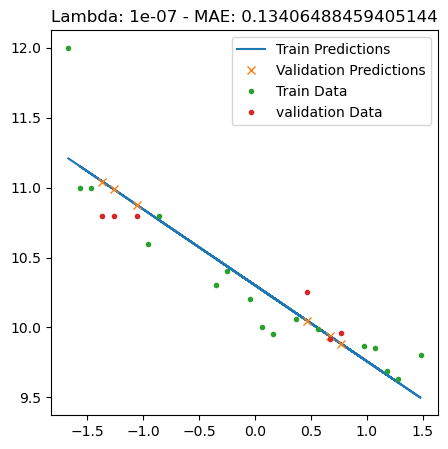

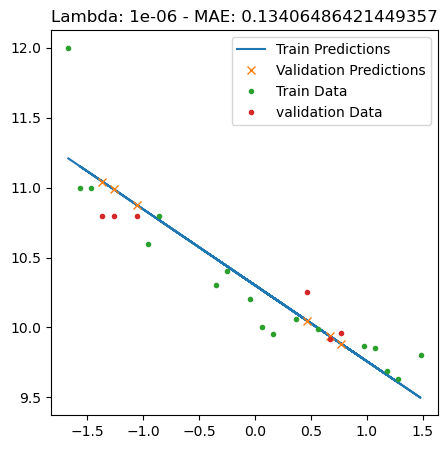

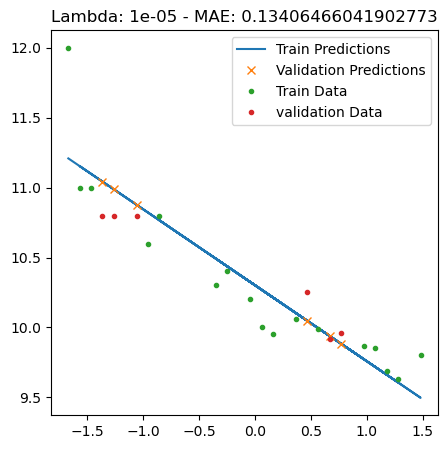

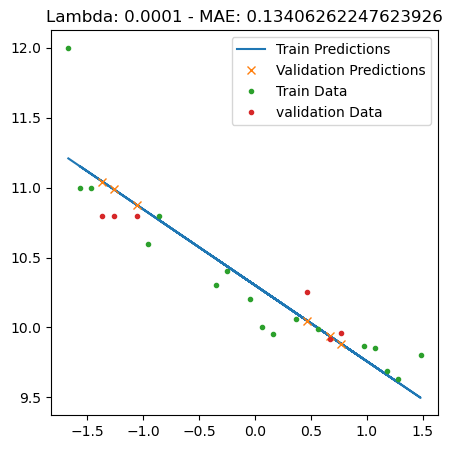

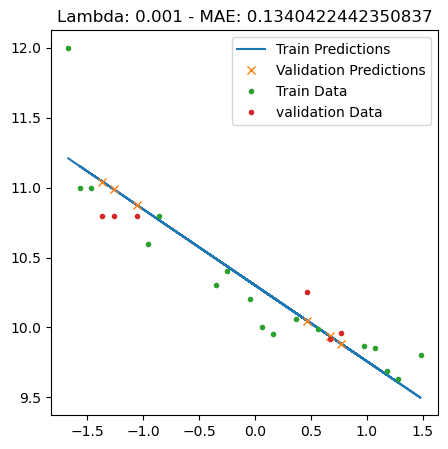

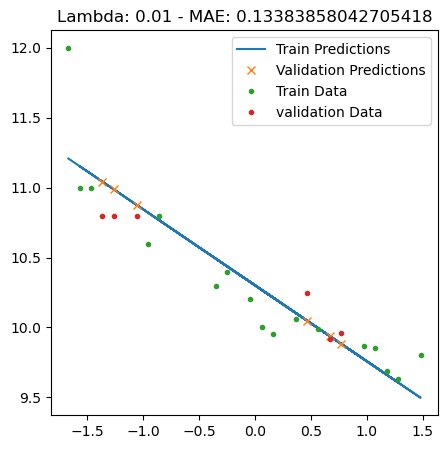

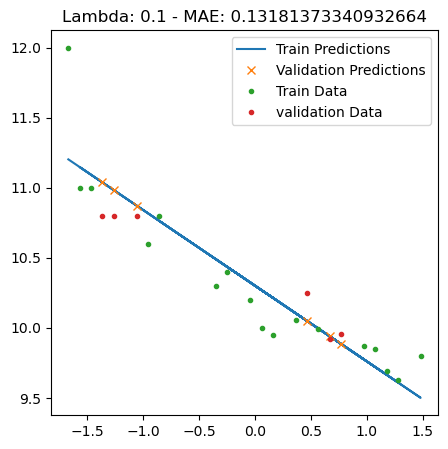

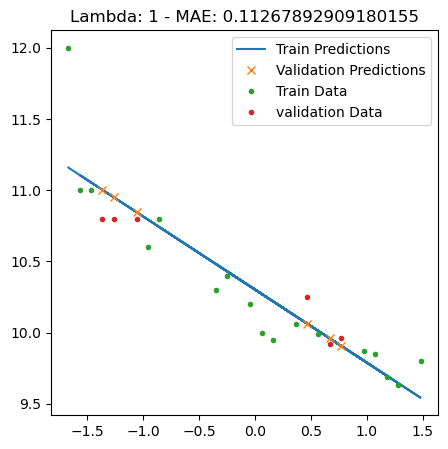

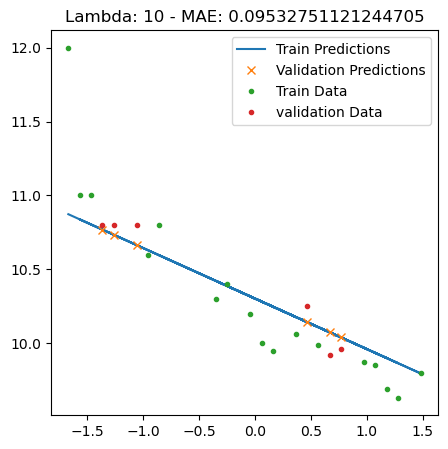

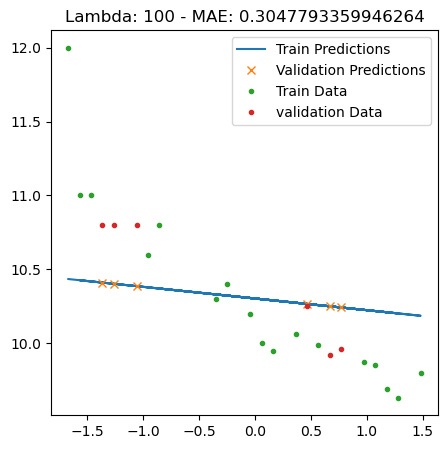

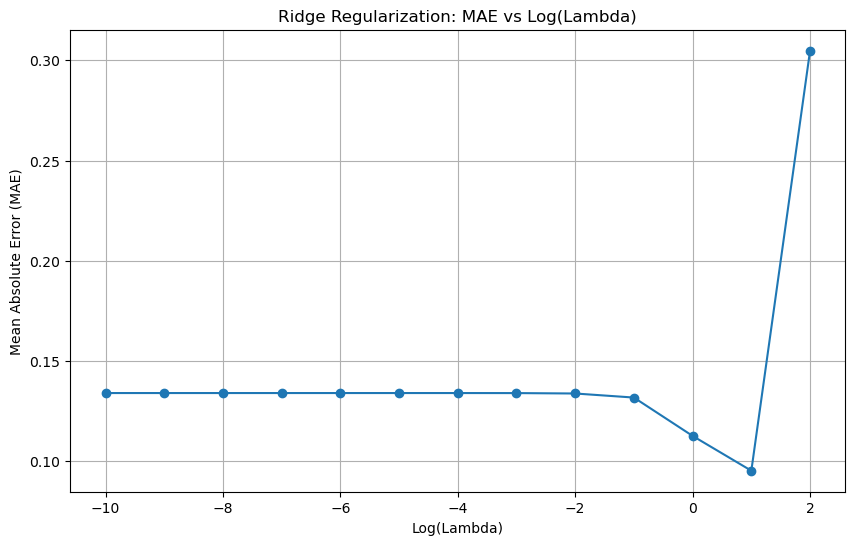

In [8]:
lambda_values = [10**i for i in range(-10, 3)]
errors = []
min_error = inf
best_l = 0
for l in lambda_values:
    ridge_model = Ridge_(l)
    w = ridge_model.ridge_fit(X_train, y_train)
    y_hat = ridge_model.ridge_predict(X_train)
    pred = ridge_model.ridge_predict(X_val)
    # Convert lambda to an integer for subplot index
    l_index = lambda_values.index(l) + 1
    e = mean_absolute_error(y_val, pred)
    errors.append(e)
    if e < min_error:
        min_error = e
        best_l = l
    plt.figure(figsize=(5, 5))
    # plt.subplot(5, 4, l_index)
    plt.tight_layout()
    plt.plot(X_train[:, 1], y_hat, label='Train Predictions')
    plt.plot(X_val[:, 1], pred, 'x', label='Validation Predictions')
    plt.plot(X_train[:, 1], y_train, '.', label='Train Data')
    plt.plot(X_val[:, 1], y_val, '.', label='validation Data')
    plt.title(f"Lambda: {l} - MAE: {mean_absolute_error(y_val, pred)}")
    plt.legend()

# Plotting MAE vs Log(Lambda)
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambda_values), errors, marker='o')
plt.title('Ridge Regularization: MAE vs Log(Lambda)')
plt.xlabel('Log(Lambda)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()

In [9]:
ridge_model = Ridge_(best_l)
w = ridge_model.ridge_fit(X_train, y_train)
predictions = ridge_model.ridge_predict(X_test)
mae_test = mean_absolute_error(y_test, predictions)
mae_test

0.14498131453309368

In [10]:
w

array([10.30235294, -0.34236281])

In [11]:
# test with sklearn
ridge_model2 = Ridge(alpha=best_l)
ridge_model2.fit(X_train[:, 1].reshape(-1, 1), y_train)
ridge_model2.intercept_, ridge_model2.coef_

sklearn_predictions = ridge_model2.predict(X_test[:, 1].reshape(-1, 1))

# difference between our model predicions and sklearn ones
diff = predictions - sklearn_predictions
mean_absolute_error(sklearn_predictions, predictions)

1.7763568394002505e-15

In [14]:
# comparison with lasso
lasso_model = Lasso(alpha=best_l)
lasso_model.fit(X_train[:, 1].reshape(-1, 1), y_train)
lasso_model.intercept_, lasso_model.coef_
lasso_predictions = lasso_model.predict(X_test[:, 1].reshape(-1, 1))

In [15]:
mean_absolute_error(sklearn_predictions, lasso_predictions)

0.23180653706744092